Вариант 8

In [23]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
 
set_matplotlib_formats ('png')

/tmp/ipykernel_11107/4294946217.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats ('png')


In [24]:
x0 = 1 / np.sqrt(10)
h = 0.00001
L = int(1 / h)

In [25]:
def k(x):
    if (x < x0):
        return np.cos(x) + 2
    else:
        return np.sin(x) + 2

In [26]:
def q(x):
    return 1

In [27]:
def f(x):
    if (x < x0):
        return 2 *x
    else:
        return 0

In [28]:
#точки слева и справа от x0
l_left = int(x0 / h)
l_right = l_left + 1

In [29]:
u_start = 1
u_end = 0

In [30]:
x = [h * i for i in range(L + 1)]

u = np.zeros (L + 1)
u[0] = u_start
u[-1] = u_end

In [31]:
a = np.zeros(L + 1)
b = np.zeros(L + 1)
c = np.zeros(L + 1)
d = np.zeros(L + 1)

for i in range (L):
    if (i != l_left and i != l_right):
        a[i] = k((i + 0.5) * h)
        b[i] = -(k((i + 0.5) * h) + k((i - 0.5) * h) + q(i*h) * h ** 2 )
        c[i] = k((i - 0.5) * h)
        d[i] = -f(i * h) * h ** 2

In [32]:
alpha = np.zeros(L + 1)
alpha[1] = -a[1] / b[1]
alpha[L-1] = -c[L - 1] / b[L - 1]

beta  = np.zeros(L + 1)
beta[1]  = (d[1] - c[1] * u_start) / b[1]
beta[L-1]  = (d[L - 1] - c[L - 1] * u_end) / b[L - 1]

In [33]:
for i in range (2, l_left):
    alpha[i] = -a[i] / (b[i] + c[i] * alpha[i - 1])
    beta[i]  = (d[i] - c[i] * beta[i - 1]) / (b[i] + c[i] * alpha[i - 1])

for i in range (L - 2, l_right, -1):
    alpha[i] = -c[i] / (b[i] + a[i] * alpha[i + 1])
    beta[i]  = (d[i] - a[i] * beta[i + 1]) / (b[i] + a[i] * alpha[i + 1])

In [34]:
u[l_left] = (k(l_left * h) * beta[l_left - 1] + k(l_right * h) * beta[l_right + 1]) / (k(l_left * h) * (1 - alpha[l_left - 1]) + k(l_right * h) * (1 - alpha[l_right + 1]))
u[l_right] = u[l_left]

In [35]:
u[l_left - 1] = alpha[l_left - 1] * u[l_left] + beta[l_left - 1]
u[l_right + 1] = alpha[l_right + 1] * u[l_right] + beta[l_right + 1]

In [36]:
for i in range(l_left - 1, 0, -1):
    u[i] = alpha[i] * u[i + 1] + beta[i]

for i in range(l_right + 1, L):
        u[i] = alpha[i] * u[i - 1] + beta[i]

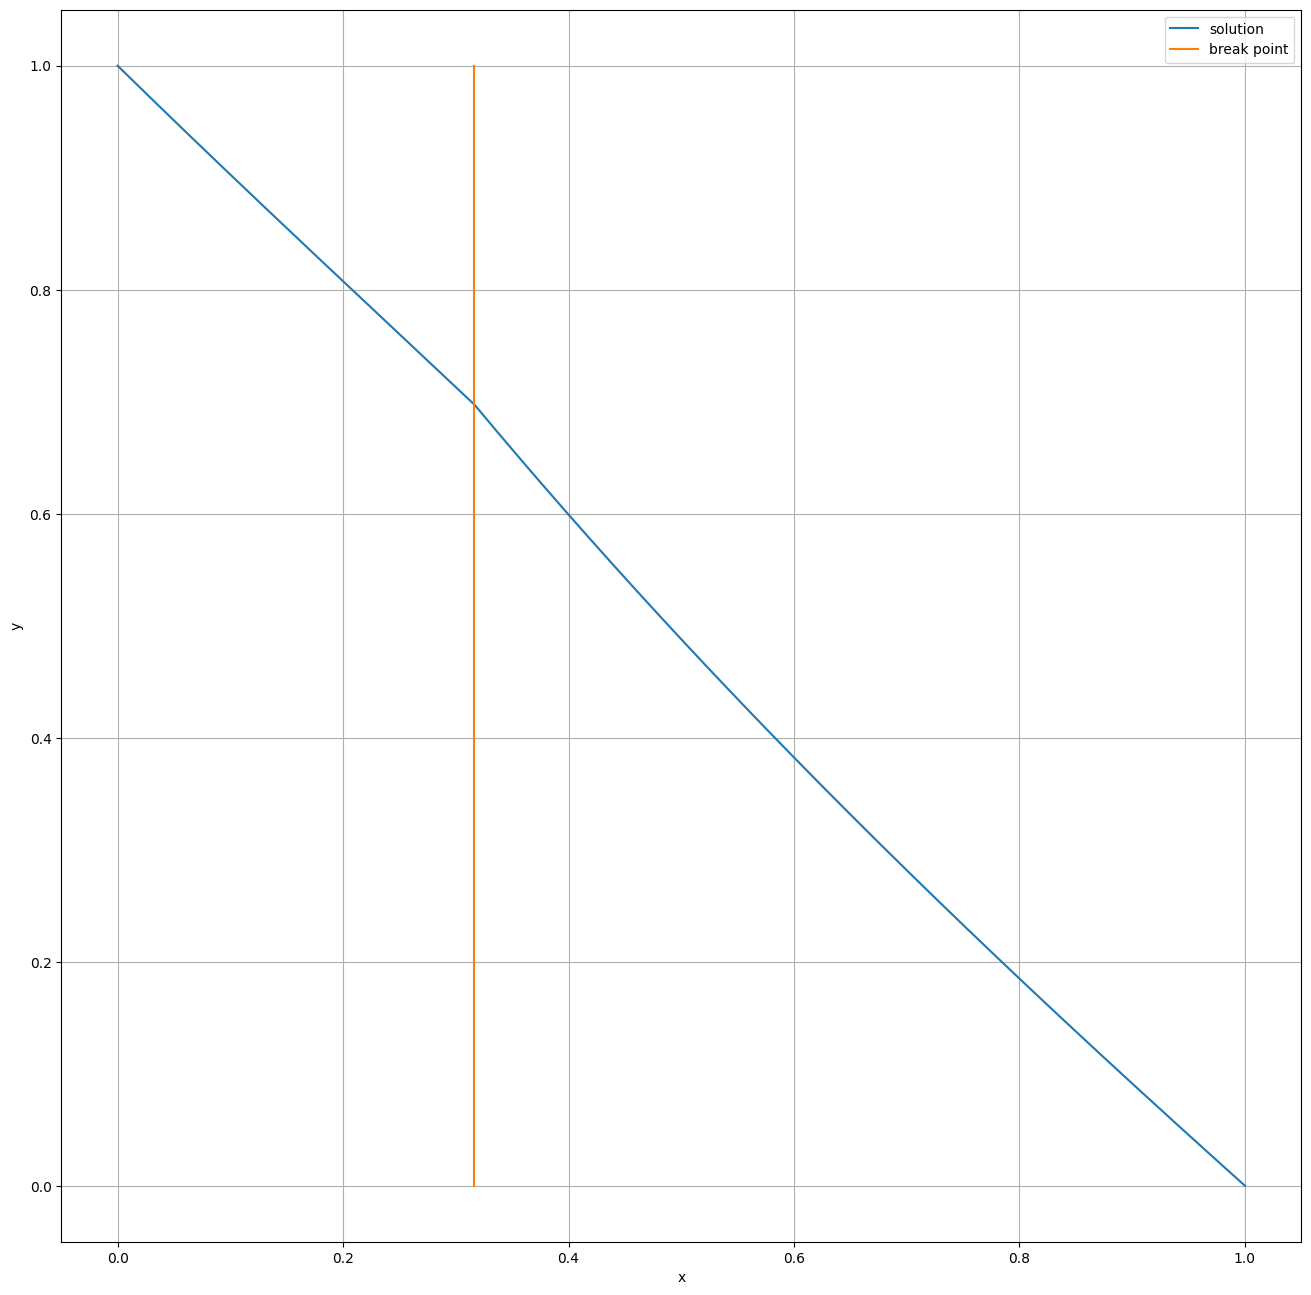

In [37]:
plt.figure(figsize=(16,16))
ax1 = plt.axes()
ax1.set_xlabel("x")
ax1.set_ylabel("y")

plt.plot (x, u, label="solution")

bp_y = [i for i in np.linspace (min(u), max(u), 100)]
bp_x = [x0 for i in range(100)]

plt.plot (bp_x, bp_y, label="break point")

plt.grid()
plt.legend()
plt.savefig("picturies/graph1.png", dpi=100)
plt.show()

Построим увеличенный график около точки разрыва

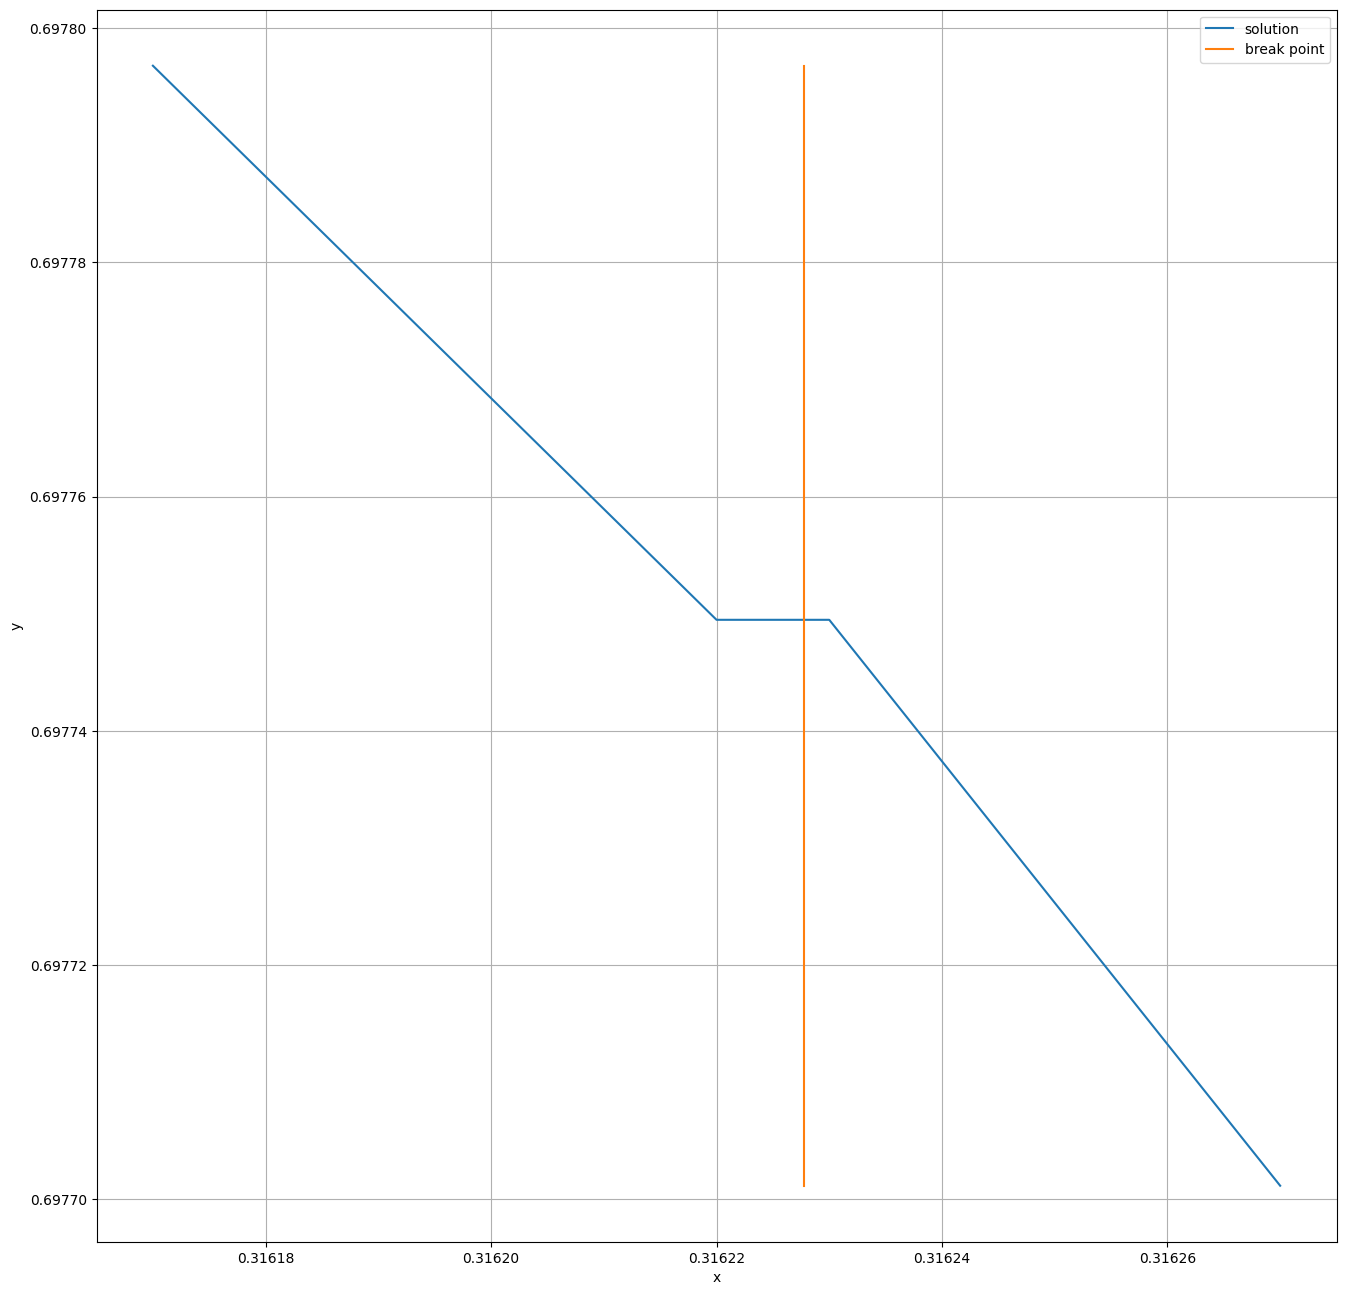

In [38]:
diff = 5

tmp_u = u[l_left - diff:l_right + diff]
tmp_x = x[l_left - diff:l_right + diff]

plt.figure(figsize=(16,16))
ax1 = plt.axes()
ax1.set_xlabel("x")
ax1.set_ylabel("y")

plt.plot (tmp_x, tmp_u, label="solution")

bp_y = [i for i in np.linspace (min(tmp_u), max(tmp_u), 100)]
bp_x = [x0 for i in range(100)]

plt.plot (bp_x, bp_y, label="break point")

plt.grid()
plt.legend()
plt.savefig("picturies/graph2.png", dpi=100)
plt.show()